## Timelag Analysis of Model Performance

This notebook compares how **LSTM** and **Transformer** models perform across different input time windows (timelags). It:

- Loads F1 and AUCPR metrics for various timelags and seeds,
- Computes mean performance per timelag,
- Visualizes metric trends across Training, Validation, and Testing sets.

The goal is to understand how input history length influences prediction quality and guide model/timelag selection.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/Timelag_Results_meanSeed.csv", sep=',')
df_old = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/Timelag_Results_seed1234.csv", sep=',')

df['Timelag'] = df['Timelag'].astype(int)
df.sort_values(by='Timelag', inplace=True)
df

,Timelag,Model,F1 Training,F1 Validation,F1 Testing,AUCPR Training,AUCPR Validation,AUCPR Testing,Seed,Date
0,5,LSTM,0.807885,0.793248,0.761811,0.872904,0.861053,0.829779,-1,mean
6,5,Transformer,0.817204,0.789865,0.766840,0.886462,0.863486,0.849925,-1,mean
1,10,LSTM,0.824740,0.807686,0.777385,0.892207,0.877292,0.847854,-1,mean
7,10,Transformer,0.829256,0.811966,0.776627,0.899533,0.883461,0.861335,-1,mean
2,15,LSTM,0.832266,0.814835,0.777191,0.899597,0.882939,0.850870,-1,mean
8,15,Transformer,0.835777,0.811587,0.783549,0.908765,0.891075,0.865205,-1,mean
3,20,LSTM,0.835103,0.823284,0.773980,0.903819,0.887351,0.850406,-1,mean
9,20,Transformer,0.845365,0.815015,0.786201,0.916715,0.889756,0.863177,-1,mean
4,25,LSTM,0.842167,0.825993,0.773043,0.907703,0.890422,0.854021,-1,mean
10,25,Transformer,0.849151,0.814173,0.785706,0.921112,0.892803,0.863629,-1,mean


In [52]:
lstm = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/lstm__Seed0_9_all_timelags1.csv", sep=';')
transformer = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/transformer_Seed0_9_all_timelags1.csv", sep=';')

In [56]:
import pandas as pd


def append_mean_rows_by_timelag(model_csv, output_path):
    df = model_csv

    # List of columns to average (all numeric, excluding 'Timelag', 'Model', 'Seed', 'Date')
    value_columns = [col for col in df.columns if col not in ["Timelag", "Model", "Seed", "Date"]]

    # Group by Timelag and compute means
    mean_rows = df.groupby("Timelag")[value_columns].mean().reset_index()

    # Fill constant columns for mean rows
    mean_rows["Model"] = "mean"
    mean_rows["Seed"] = -1
    mean_rows["Date"] = "mean"

    # Append to original DataFrame
    df_with_means = pd.concat([df, mean_rows], ignore_index=True)


    df_with_means.to_csv(output_path, index=False)

    print(f"✅ Saved file with mean rows to: {output_path}")
    return df_with_means


append_mean_rows_by_timelag(lstm, "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/lstm_Seed0_9_all_timelags1.csv")

✅ Saved file with mean rows to: /Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/lstm_Seed0_9_all_timelags1.csv


,Timelag,Model,F1 Training,F1 Validation,F1 Testing,AUCPR Training,AUCPR Validation,AUCPR Testing,Seed,Date
0,5,lstm,0.807155,0.792142,0.761807,0.871265,0.860995,0.830871,1,0703_111458
1,5,lstm,0.807659,0.792429,0.762133,0.872626,0.859862,0.829306,2,0703_112133
2,5,lstm,0.809087,0.792167,0.762851,0.873842,0.862716,0.830476,3,0703_112803
3,5,lstm,0.809257,0.793970,0.758549,0.871850,0.859825,0.828234,4,0703_113432
4,5,lstm,0.806936,0.794174,0.763562,0.873059,0.860683,0.829558,5,0703_114059
...,...,...,...,...,...,...,...,...,...,...
61,10,mean,0.824740,0.807686,0.777385,0.892207,0.877292,0.847854,-1,mean
62,15,mean,0.832266,0.814835,0.777191,0.899597,0.882939,0.850870,-1,mean
63,20,mean,0.835103,0.823284,0.773980,0.903819,0.887351,0.850406,-1,mean
64,25,mean,0.842167,0.825993,0.773043,0.907703,0.890422,0.854021,-1,mean


In [61]:
def plot_metric_over_timelag(metric_prefix, ylabel, title):
    plt.figure(figsize=(10, 6))


    colors = {
        'Transformer': ['#FF3E1B', '#C9021D', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['#40F6FF', '#3383C9', '#1725C9']          # hellblau, mittelblau, dunkelblau
    }

    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        for i, split in enumerate(['Training', 'Validation', 'Testing']):
            plt.plot(subset['Timelag'],
                     subset[f"{metric_prefix} {split}"],
                     marker='o',
                     label=f"{model} - {split}",
                     color=colors[model][i])

    plt.xlabel("Timelag")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

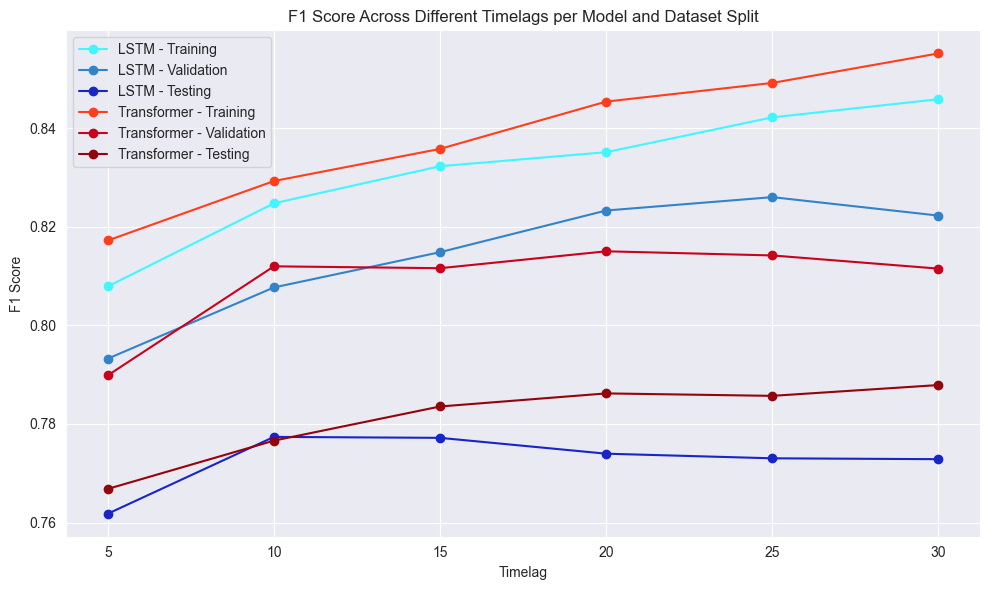

In [62]:
plot_metric_over_timelag('F1', 'F1 Score', 'F1 Score Across Different Timelags per Model and Dataset Split')

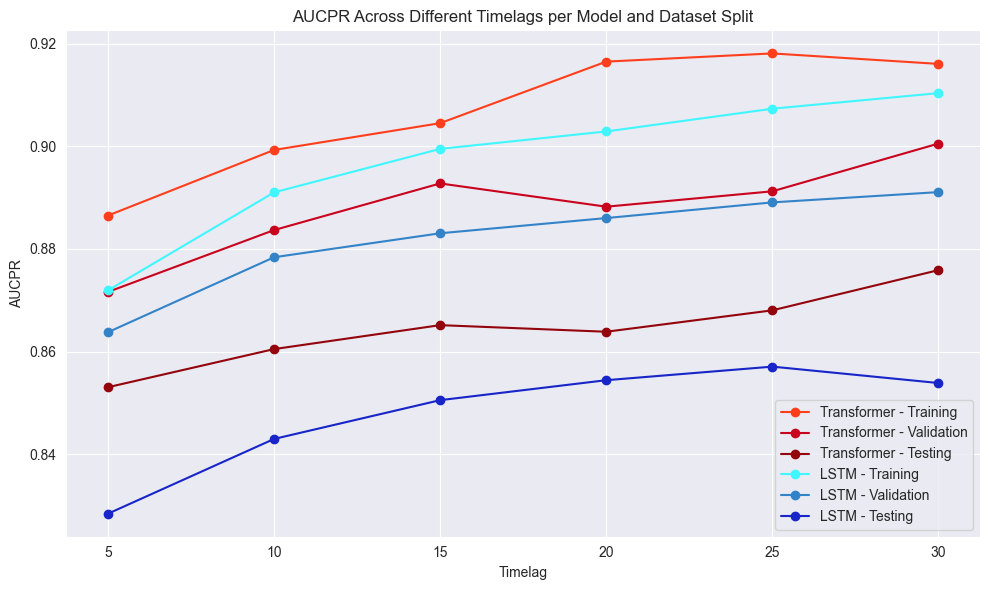

In [4]:
# AUCPR-Plot
plot_metric_over_timelag('AUCPR', 'AUCPR', 'AUCPR Across Different Timelags per Model and Dataset Split')